In [16]:
# # Exploratory Data Analysis: Data Specification (Beacon Fixed Annuity)

# This notebook provides a comprehensive EDA of the **data_specifications_01262026.xlsx** file — a data dictionary/specification document for the Beacon Fixed Annuity database.

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (CSV export of data_specification_01262026.xlsx)
df = pd.read_csv("/Users/ravichandramathi/Desktop/agentspacetechnicalassessment/data_specifications_01262026.xlsx - fa.csv")
print("Data loaded successfully!")
df.head(10)

Data loaded successfully!


,#,FILE_NAME,COLUMN_NAME,IS_ID,ORDINAL_POSITION,DATA_TYPE,CHAR_MAX_LENGTH,NUM_PRECISION,NUM_SCALE,IS_NULLABLE,DESCRIPTION,NOTES
0,1,beacon_client_fixed_age,PRODUCTID,Yes,2,numeric,NaN,18.0,0.0,YES,A unique identifier assigned by Beacon that li...,NaN
1,2,beacon_client_fixed_age,MINANQ,No,4,bigint,NaN,19.0,0.0,YES,Minimum age until which the Annuitant can purc...,NaN
2,3,beacon_client_fixed_age,MINAQ,No,5,bigint,NaN,19.0,0.0,YES,Minimum age until which the Annuitant can purc...,NaN
3,4,beacon_client_fixed_age,MINONQ,No,6,bigint,NaN,19.0,0.0,YES,Minimum age until which the Owner can purchase...,NaN
4,5,beacon_client_fixed_age,MINOQ,No,7,bigint,NaN,19.0,0.0,YES,Minimum age until which the Owner can purchase...,NaN
5,6,beacon_client_fixed_age,MXANQ,No,8,bigint,NaN,19.0,0.0,YES,Maximum age until which the annuitant can purc...,NaN
6,7,beacon_client_fixed_age,MXAQ,No,9,bigint,NaN,19.0,0.0,YES,Maximum age until which the annuitant can purc...,NaN
7,8,beacon_client_fixed_age,MXAZNQ,No,10,bigint,NaN,19.0,0.0,YES,Maximum annuitization age of owner or annuitan...,NaN
8,9,beacon_client_fixed_age,MXAZQ,No,11,bigint,NaN,19.0,0.0,YES,Maximum annuitization age of owner or annuitan...,NaN
9,10,beacon_client_fixed_age,MXONQ,No,12,bigint,NaN,19.0,0.0,YES,Maximum age until which the owner can purchase...,NaN


In [18]:
df.shape

(244, 12)

## 1. Data Overview & Variables

### Variables (Columns) in the Specification Dataset

The specification file contains metadata about database tables. Here are the variables:

In [19]:
# Display all variables (columns) in the specification
print("VARIABLES IN THE DATA SPECIFICATION:\n")
print("=" * 60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print(f"\nTotal: {len(df.columns)} variables")

VARIABLES IN THE DATA SPECIFICATION:

 1. #
 2. FILE_NAME
 3. COLUMN_NAME
 4. IS_ID
 5. ORDINAL_POSITION
 6. DATA_TYPE
 7. CHAR_MAX_LENGTH
 8. NUM_PRECISION
 9. NUM_SCALE
10. IS_NULLABLE
11. DESCRIPTION
12. NOTES

Total: 12 variables


In [20]:
# Data shape and basic info
print("SHAPE:", df.shape)
print("\nCOLUMN DEFAULTS & DYPES:")
print(df.dtypes)
print("\nBASIC INFO:")
df.info()

SHAPE: (244, 12)

COLUMN DEFAULTS & DYPES:
#                     int64
FILE_NAME            object
COLUMN_NAME          object
IS_ID                object
ORDINAL_POSITION      int64
DATA_TYPE            object
CHAR_MAX_LENGTH     float64
NUM_PRECISION       float64
NUM_SCALE           float64
IS_NULLABLE          object
DESCRIPTION          object
NOTES               float64
dtype: object

BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 244 non-null    int64  
 1   FILE_NAME         244 non-null    object 
 2   COLUMN_NAME       244 non-null    object 
 3   IS_ID             244 non-null    object 
 4   ORDINAL_POSITION  244 non-null    int64  
 5   DATA_TYPE         244 non-null    object 
 6   CHAR_MAX_LENGTH   86 non-null     float64
 7   NUM_PRECISION     96 non-null     float64
 8   NUM_SCALE     

## 2. Database Tables (FILE_NAME) — What We Have

The specification describes columns across multiple database tables:

In [21]:
# Count of variables (columns) per database table
tables_summary = df.groupby("FILE_NAME").agg(
    Column_Count=("COLUMN_NAME", "count"),
    ID_Columns=("IS_ID", lambda x: (x == "Yes").sum()),
    Nullable_Count=("IS_NULLABLE", lambda x: (x == "YES").sum()),
).sort_values("Column_Count", ascending=False)

print("TABLES & COLUMN COUNTS:\n")
display(tables_summary)
print(f"\nTotal tables: {len(tables_summary)}")

TABLES & COLUMN COUNTS:



,Column_Count,ID_Columns,Nullable_Count
FILE_NAME,,,
beacon_client_fixed_Rates,83,12,67
beacon_client_fixed_Contract_Contributions,49,3,32
beacon_client_fixed_Waivers,27,3,15
beacon_client_fixed_gmwb,25,3,22
beacon_client_fixed_products,15,2,11
beacon_client_fixed_age,13,3,12
beacon_client_fixed_gmab,10,3,7
beacon_client_fixed_bonuses,7,3,5
beacon_client_fixed_death_benefits,7,3,5



Total tables: 11


In [22]:
# Variables (column names) per table
print("VARIABLES BY TABLE:\n")
for table in df["FILE_NAME"].unique():
    cols = df[df["FILE_NAME"] == table]["COLUMN_NAME"].tolist()
    print(f"📁 {table} ({len(cols)} columns)")
    print(f"   {', '.join(cols[:8])}{'...' if len(cols) > 8 else ''}")
    if len(cols) > 8:
        print(f"   ... and {len(cols) - 8} more")
    print()

VARIABLES BY TABLE:

📁 beacon_client_fixed_age (13 columns)
   PRODUCTID, MINANQ, MINAQ, MINONQ, MINOQ, MXANQ, MXAQ, MXAZNQ...
   ... and 5 more

📁 beacon_client_fixed_bonuses (7 columns)
   productid, bonus_id, name, sequence, inception_date, closed_date, UNIQUEID

📁 beacon_client_fixed_companies (3 columns)
   company_name, COMPANYID, UNIQUEID

📁 beacon_client_fixed_death_benefits (7 columns)
   productid, name, sequence, benefit_id, sub_sequent_premium, partial_withdrawals, UNIQUEID

📁 beacon_client_fixed_gmab (10 columns)
   name, sequence, closed_date, product_id, gmab_id, introduction_date, avail_when_added, target_anniversery_years...
   ... and 2 more

📁 beacon_client_fixed_gmwb (25 columns)
   productid, name, sequence, closed_date, partial_withdrawals, introduction_date, gmwb_type, reqd_min_distributions...
   ... and 17 more

📁 beacon_client_fixed_products (15 columns)
   PRODUCTID, name, closed_date, Company name, EXPDATE, INCDATE, PREMIUM_TYPE, WINAFTSURR...
   ... and 7 m

## 3. Data Types Distribution

Types of columns across the specification:

DATA TYPES:

DATA_TYPE
varchar     81
numeric     68
bit         37
datetime    25
int         12
bigint      10
nvarchar     5
decimal      4
money        2


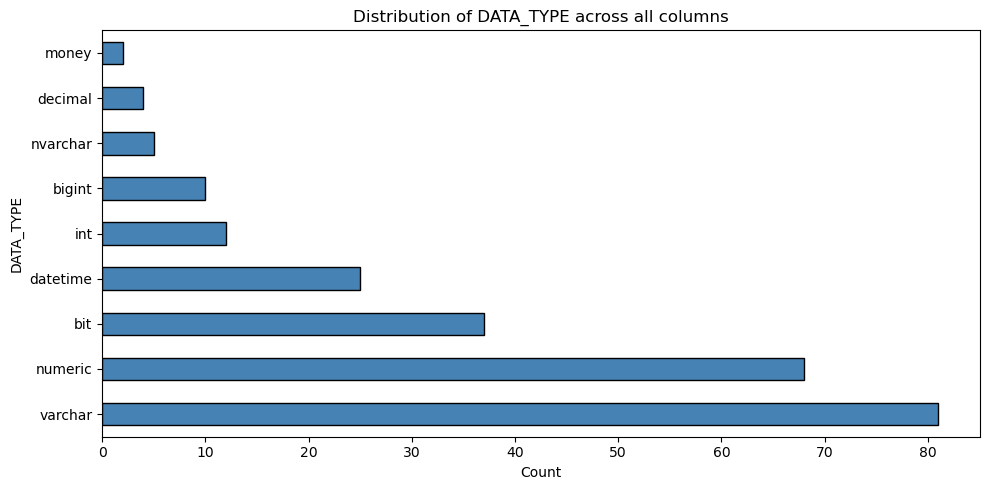

In [23]:
# Data type distribution
dt_counts = df["DATA_TYPE"].value_counts()
print("DATA TYPES:\n")
print(dt_counts.to_string())

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
dt_counts.plot(kind="barh", ax=ax, color="steelblue", edgecolor="black")
ax.set_xlabel("Count")
ax.set_title("Distribution of DATA_TYPE across all columns")
plt.tight_layout()
plt.show()

## 4. Nullability (IS_NULLABLE) & Identifier Columns (IS_ID)

In [24]:
# Nullability
print("IS_NULLABLE distribution:")
print(df["IS_NULLABLE"].value_counts())

# ID columns
id_cols = df[df["IS_ID"] == "Yes"]
print(f"\n\nID columns (IS_ID = Yes): {len(id_cols)}")
print("\nID columns by table:")
display(id_cols.groupby("FILE_NAME")["COLUMN_NAME"].apply(list).to_frame("ID_Columns"))

IS_NULLABLE distribution:
IS_NULLABLE
YES    181
NO      63
Name: count, dtype: int64


ID columns (IS_ID = Yes): 40

ID columns by table:


,ID_Columns
FILE_NAME,
beacon_client_fixed_Contract_Contributions,"[PRODUCTID, CONTRIBID, UNIQUEID]"
beacon_client_fixed_Rates,"[PRODUCTID, bandid, blockid, varid, schedid, U..."
beacon_client_fixed_Waivers,"[productid, UNIQUEID, WAIVERID]"
beacon_client_fixed_Withdrawals,"[PRODUCTID, UNIQUEID, WITHID]"
beacon_client_fixed_age,"[PRODUCTID, UNIQUEID, AGEID]"
beacon_client_fixed_bonuses,"[productid, bonus_id, UNIQUEID]"
beacon_client_fixed_companies,"[COMPANYID, UNIQUEID]"
beacon_client_fixed_death_benefits,"[productid, benefit_id, UNIQUEID]"
beacon_client_fixed_gmab,"[product_id, gmab_id, UNIQUEID]"


## 5. Complete Variable Reference (Table × Column × Type × Description)

Full listing of all variables with their attributes:

In [25]:
# Full variable reference - select key columns
ref = df[["FILE_NAME", "COLUMN_NAME", "DATA_TYPE", "IS_ID", "IS_NULLABLE", "ORDINAL_POSITION", "DESCRIPTION"]].sort_values(
    ["FILE_NAME", "ORDINAL_POSITION"]
)
display(ref)

,FILE_NAME,COLUMN_NAME,DATA_TYPE,IS_ID,IS_NULLABLE,ORDINAL_POSITION,DESCRIPTION
243,beacon_client_fixed_Contract_Contributions,UNIQUEID,varchar,Yes,YES,1,A unique identifier assigned by Beacon that di...
207,beacon_client_fixed_Contract_Contributions,PRODUCTID,numeric,Yes,YES,2,A unique identifier assigned by Beacon that li...
234,beacon_client_fixed_Contract_Contributions,CONTRIBID,numeric,Yes,NO,3,A unique identifier used to distinguish contra...
222,beacon_client_fixed_Contract_Contributions,DATESTAMP,datetime,No,YES,4,Date / time data row created.
233,beacon_client_fixed_Contract_Contributions,DES_EXTSUR,varchar,No,YES,5,Additional information regarding contributions...
...,...,...,...,...,...,...,...
74,beacon_client_fixed_products,GUARPRIN,bit,No,NO,11,Original contributions are protected and canno...
77,beacon_client_fixed_products,FREEPERIOD,numeric,No,YES,12,A set number of days during which the annuity ...
76,beacon_client_fixed_products,PARTIC,bit,No,NO,13,The percentage of an index’s gain that is cred...
75,beacon_client_fixed_products,rating_am_best,varchar,No,YES,14,Ratings that assess an insurance company's fin...


## 6. Descriptive Statistics & Missing Values

Numeric fields and text length stats:

In [26]:
# Convert numeric cols for stats (ignore # which is row index)
numeric_cols = ["ORDINAL_POSITION", "CHAR_MAX_LENGTH", "NUM_PRECISION", "NUM_SCALE"]
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Descriptive stats for numeric specification fields:\n")
display(df[numeric_cols].describe())

# Check for any nulls in key columns
print("\nMissing values in key columns:")
print(df[["FILE_NAME", "COLUMN_NAME", "DATA_TYPE", "DESCRIPTION"]].isnull().sum())

Descriptive stats for numeric specification fields:



,ORDINAL_POSITION,CHAR_MAX_LENGTH,NUM_PRECISION,NUM_SCALE
count,244.000000,86.000000,96.000000,96.000000
mean,23.594262,4214.453488,14.479167,1.093750
std,21.649550,3990.364255,5.688361,1.414795
min,1.000000,-1.000000,1.000000,0.000000
25%,6.000000,3.000000,10.000000,0.000000
50%,16.000000,8000.000000,18.000000,0.000000
75%,36.000000,8000.000000,18.000000,2.000000
max,83.000000,8000.000000,19.000000,4.000000



Missing values in key columns:
FILE_NAME      0
COLUMN_NAME    0
DATA_TYPE      0
DESCRIPTION    0
dtype: int64


## 7. Visual Summary

Charts summarizing the data specification:

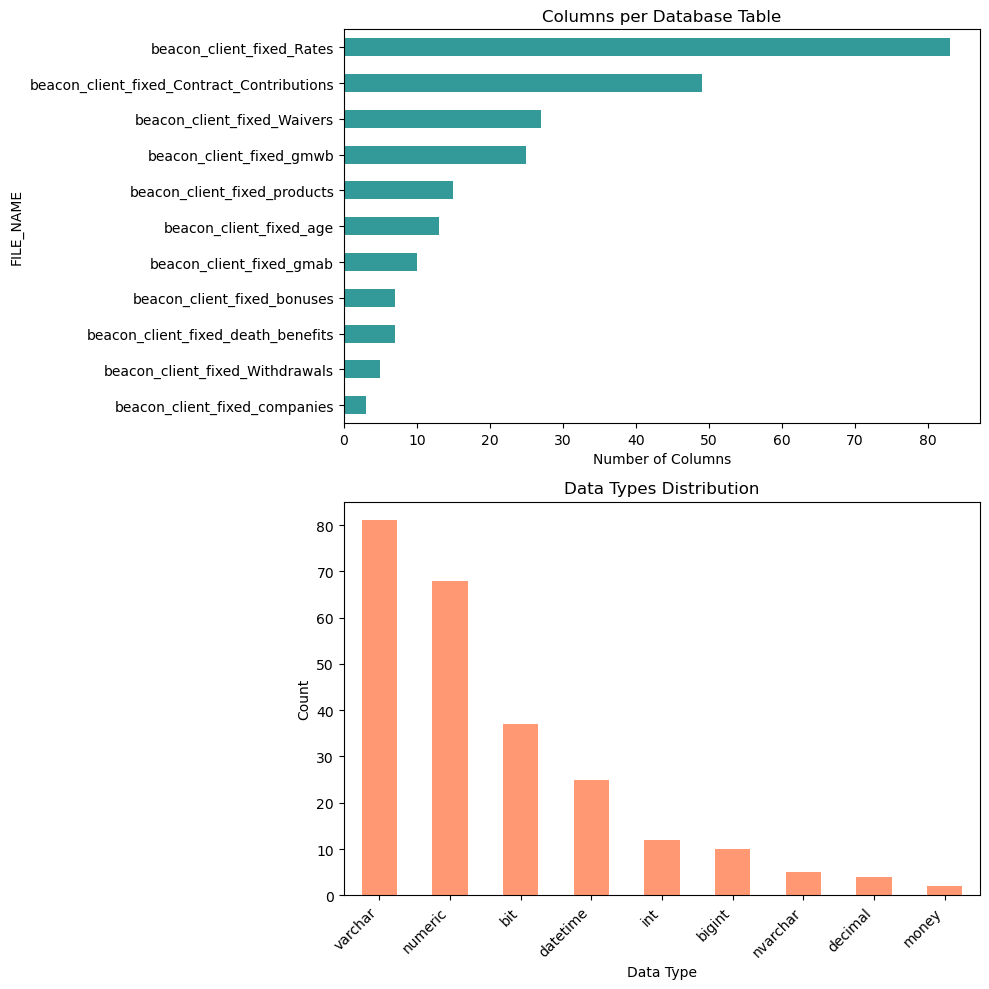

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Columns per table
ax1 = axes[0]
table_counts = df["FILE_NAME"].value_counts()
table_counts.plot(kind="barh", ax=ax1, color="teal", alpha=0.8)
ax1.set_xlabel("Number of Columns")
ax1.set_title("Columns per Database Table")
ax1.invert_yaxis()

# Data types by count
ax2 = axes[1]
df["DATA_TYPE"].value_counts().plot(kind="bar", ax=ax2, color="coral", alpha=0.8)
ax2.set_xlabel("Data Type")
ax2.set_ylabel("Count")
ax2.set_title("Data Types Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 9. Export: One Excel per Table (Dashboard-Ready Format)

Split the spec into separate Excel files — one per `FILE_NAME` — with:
- **Schema** sheet: One row per column (Column Name, Data Type, Description, Nullable, etc.) for frontend/API
- **Pivoted** sheet: Attributes as rows, column names as headers for compact reference

In [28]:
# Run the split script
%run split_spec_to_tables.py

# List generated files
import os
print("\nGenerated files in dashboard_specs/:")
for f in sorted(os.listdir("dashboard_specs")):
    print(f"  • {f}")

Created: dashboard_specs/beacon_client_fixed_age.xlsx
Created: dashboard_specs/beacon_client_fixed_bonuses.xlsx
Created: dashboard_specs/beacon_client_fixed_companies.xlsx
Created: dashboard_specs/beacon_client_fixed_death_benefits.xlsx
Created: dashboard_specs/beacon_client_fixed_gmab.xlsx
Created: dashboard_specs/beacon_client_fixed_gmwb.xlsx
Created: dashboard_specs/beacon_client_fixed_products.xlsx
Created: dashboard_specs/beacon_client_fixed_Rates.xlsx
Created: dashboard_specs/beacon_client_fixed_Waivers.xlsx
Created: dashboard_specs/beacon_client_fixed_Withdrawals.xlsx
Created: dashboard_specs/beacon_client_fixed_Contract_Contributions.xlsx

Done! 11 Excel files in 'dashboard_specs/'

Generated files in dashboard_specs/:
  • beacon_client_fixed_Contract_Contributions.xlsx
  • beacon_client_fixed_Rates.xlsx
  • beacon_client_fixed_Waivers.xlsx
  • beacon_client_fixed_Withdrawals.xlsx
  • beacon_client_fixed_age.xlsx
  • beacon_client_fixed_bonuses.xlsx
  • beacon_client_fixed_comp

## 8. Summary

**Data specification variables:**

| Variable | Description |
|----------|-------------|
| `#` | Row/record number |
| `FILE_NAME` | Database table name |
| `COLUMN_NAME` | Column name |
| `IS_ID` | Whether column is an identifier (Yes/No) |
| `ORDINAL_POSITION` | Column position in table |
| `DATA_TYPE` | SQL data type (varchar, numeric, bigint, datetime, bit, etc.) |
| `CHAR_MAX_LENGTH` | Max length for varchar columns |
| `NUM_PRECISION` | Numeric precision |
| `NUM_SCALE` | Numeric scale |
| `IS_NULLABLE` | Whether column allows NULL (YES/NO) |
| `DESCRIPTION` | Column description |
| `NOTES` | Additional notes |

**Tables covered:** Beacon Fixed Annuity schema (age, bonuses, companies, death_benefits, gmab, gmwb, products, Rates, Waivers, Withdrawals, Contract_Contributions).

## 10.1 Details of All 11 Splits

Table-level info: column names, data types, nullable, and unique values of schema attributes per table.

In [29]:
import os
import pandas as pd

split_dir = "dashboard_specs"
split_files = sorted([f for f in os.listdir(split_dir) if f.endswith(".xlsx")])

for i, f in enumerate(split_files, 1):
    table_name = f.replace(".xlsx", "")
    sch = pd.read_excel(os.path.join(split_dir, f), sheet_name="Schema")

    # Compact summary: Column Name | Data Type | Nullable
    summary = sch[["Column Name", "Data Type", "Nullable"]].copy()
    summary.columns = ["Column", "Data Type", "Nullable"]

    # Unique values in schema attributes (for this table)
    unique_dtypes = sch["Data Type"].dropna().unique().tolist()
    unique_nullable = sch["Nullable"].dropna().unique().tolist()

    print(f"\n{'='*70}")
    print(f"  [{i}/11]  {table_name}  —  {len(sch)} columns")
    print("="*70)
    print(f"  Unique Data Types:  {unique_dtypes}")
    print(f"  Unique Nullable:    {unique_nullable}")
    print("-"*70)
    display(summary)


  [1/11]  beacon_client_fixed_Contract_Contributions  —  49 columns
  Unique Data Types:  ['varchar', 'numeric', 'datetime', 'bit']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,PRODUCTID,numeric,YES
2,CONTRIBID,numeric,NO
3,DATESTAMP,datetime,YES
4,DES_EXTSUR,varchar,YES
5,DES_FOUR01,varchar,YES
6,DES_FOUR02,varchar,YES
7,DES_FOUR57,varchar,YES
8,DES_IRA,varchar,YES
9,DES_IRAROL,varchar,YES



  [2/11]  beacon_client_fixed_Rates  —  83 columns
  Unique Data Types:  ['varchar', 'numeric', 'int', 'bit', 'datetime', 'nvarchar', 'money', 'decimal']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,urn_code,varchar,YES
2,PRODUCTID,numeric,YES
3,varid,int,NO
4,varsubid,int,NO
...,...,...,...
78,contract_states,nvarchar,YES
79,mgir_states,nvarchar,YES
80,surr_states,nvarchar,YES
81,combined_states,varchar,YES



  [3/11]  beacon_client_fixed_Waivers  —  27 columns
  Unique Data Types:  ['varchar', 'numeric', 'bit', 'datetime']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,productid,numeric,YES
2,WAIVERID,numeric,NO
3,ANN,bit,NO
4,BAIL,bit,NO
5,DEATH,bit,NO
6,DES_ANN,varchar,YES
7,DES_BAIL,varchar,YES
8,DES_DEATH,varchar,YES
9,DES_DIS,varchar,YES



  [4/11]  beacon_client_fixed_Withdrawals  —  5 columns
  Unique Data Types:  ['varchar', 'numeric']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,PRODUCTID,numeric,YES
2,WITHID,numeric,NO
3,ANNFREEPCT,numeric,YES
4,DES_MVA,varchar,YES



  [5/11]  beacon_client_fixed_age  —  13 columns
  Unique Data Types:  ['varchar', 'numeric', 'bigint']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,PRODUCTID,numeric,YES
2,AGEID,numeric,NO
3,MINANQ,bigint,YES
4,MINAQ,bigint,YES
5,MINONQ,bigint,YES
6,MINOQ,bigint,YES
7,MXANQ,bigint,YES
8,MXAQ,bigint,YES
9,MXAZNQ,bigint,YES



  [6/11]  beacon_client_fixed_bonuses  —  7 columns
  Unique Data Types:  ['varchar', 'numeric', 'datetime']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,productid,numeric,YES
2,bonus_id,numeric,NO
3,name,varchar,YES
4,sequence,numeric,NO
5,inception_date,datetime,YES
6,closed_date,datetime,YES



  [7/11]  beacon_client_fixed_companies  —  3 columns
  Unique Data Types:  ['numeric', 'varchar']
  Unique Nullable:    ['NO', 'YES']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,numeric,NO
1,COMPANYID,numeric,NO
2,company_name,varchar,YES



  [8/11]  beacon_client_fixed_death_benefits  —  7 columns
  Unique Data Types:  ['varchar', 'numeric']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,productid,numeric,YES
2,benefit_id,numeric,NO
3,name,varchar,YES
4,sequence,numeric,NO
5,sub_sequent_premium,varchar,YES
6,partial_withdrawals,varchar,YES



  [9/11]  beacon_client_fixed_gmab  —  10 columns
  Unique Data Types:  ['varchar', 'numeric', 'datetime']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,product_id,numeric,NO
2,gmab_id,numeric,NO
3,name,varchar,YES
4,sequence,numeric,NO
5,introduction_date,datetime,YES
6,closed_date,datetime,YES
7,avail_when_added,varchar,YES
8,target_anniversery_years,numeric,YES
9,initial_reset_desc,varchar,YES



  [10/11]  beacon_client_fixed_gmwb  —  25 columns
  Unique Data Types:  ['varchar', 'numeric', 'datetime']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,varchar,YES
1,productid,numeric,YES
2,gmwb_id,numeric,NO
3,sequence,numeric,NO
4,name,varchar,YES
5,gmwb_type,numeric,YES
6,introduction_date,datetime,YES
7,closed_date,datetime,YES
8,rider_select_rule,numeric,YES
9,partial_withdrawals,varchar,YES



  [11/11]  beacon_client_fixed_products  —  15 columns
  Unique Data Types:  ['numeric', 'varchar', 'datetime', 'bit']
  Unique Nullable:    ['YES', 'NO']
----------------------------------------------------------------------


,Column,Data Type,Nullable
0,UNIQUEID,numeric,YES
1,PRODUCTID,numeric,YES
2,name,varchar,YES
3,Company name,varchar,YES
4,EXPDATE,datetime,YES
5,INCDATE,datetime,YES
6,PREMIUM_TYPE,varchar,YES
7,WINAFTSURR,numeric,YES
8,closed_date,datetime,YES
9,proprietary,bit,NO


## 10. Sanity Check: Original vs Splits

Compare the original specification with the split files to ensure no data loss.

In [30]:
import os
import pandas as pd

# 1. Load original
original = pd.read_csv("data_specifications_01262026.xlsx - fa.csv")
orig_by_table = original.groupby("FILE_NAME").size()
orig_total = len(original)
orig_tables = set(original["FILE_NAME"].unique())

# 2. Load all splits (Schema sheet)
split_dir = "dashboard_specs"
split_files = [f for f in os.listdir(split_dir) if f.endswith(".xlsx")]
split_tables = {f.replace(".xlsx", "") for f in split_files}

# Map Schema column names back to original
col_map = {"Column Name": "COLUMN_NAME", "Data Type": "DATA_TYPE", "Description": "DESCRIPTION",
           "Nullable": "IS_NULLABLE", "Is Identifier": "IS_ID", "Position": "ORDINAL_POSITION",
           "Char Max Length": "CHAR_MAX_LENGTH", "Num Precision": "NUM_PRECISION",
           "Num Scale": "NUM_SCALE", "Notes": "NOTES"}

reconstituted = []
for f in sorted(split_files):
    table_name = f.replace(".xlsx", "")
    sch = pd.read_excel(os.path.join(split_dir, f), sheet_name="Schema")
    sch["FILE_NAME"] = table_name
    sch = sch.rename(columns={"Column Name": "COLUMN_NAME"})  # key for comparison
    reconstituted.append(sch[["FILE_NAME", "COLUMN_NAME"]])

recon = pd.concat(reconstituted, ignore_index=True)
recon_by_table = recon.groupby("FILE_NAME").size()
split_total = len(recon)

# 3. Build sets for comparison
orig_pairs = set(zip(original["FILE_NAME"], original["COLUMN_NAME"]))
recon_pairs = set(zip(recon["FILE_NAME"], recon["COLUMN_NAME"]))

missing_in_splits = orig_pairs - recon_pairs
extra_in_splits = recon_pairs - orig_pairs

# 4. Report
print("=" * 60)
print("SANITY CHECK: Original vs Dashboard Splits")
print("=" * 60)

print("\n📊 OVERALL COUNTS")
print("-" * 40)
print(f"  Original total rows:        {orig_total}")
print(f"  Splits total rows:          {split_total}")
print(f"  Match: {'✅ YES' if orig_total == split_total else '❌ NO'}")

print("\n📁 TABLES")
print("-" * 40)
print(f"  Tables in original:         {len(orig_tables)}")
print(f"  Tables in splits:           {len(split_tables)}")
print(f"  Missing in splits:          {orig_tables - split_tables or 'None'}")
print(f"  Extra in splits:            {split_tables - orig_tables or 'None'}")

print("\n📋 PER-TABLE ROW COUNTS (Original vs Split)")
print("-" * 40)
all_tables = sorted(orig_tables | split_tables)
for t in all_tables:
    o = orig_by_table.get(t, 0)
    s = recon_by_table.get(t, 0)
    status = "✅" if o == s else "❌"
    print(f"  {t:45} {o:3} vs {s:3}  {status}")

print("\n🔍 COLUMN-LEVEL VERIFICATION")
print("-" * 40)
if not missing_in_splits and not extra_in_splits:
    print("  All (FILE_NAME, COLUMN_NAME) pairs match. ✅")
else:
    if missing_in_splits:
        print(f"  Missing in splits ({len(missing_in_splits)}):")
        for t, c in sorted(missing_in_splits)[:10]:
            print(f"    - {t} | {c}")
        if len(missing_in_splits) > 10:
            print(f"    ... and {len(missing_in_splits) - 10} more")
    if extra_in_splits:
        print(f"  Extra in splits ({len(extra_in_splits)}):")
        for t, c in sorted(extra_in_splits)[:10]:
            print(f"    - {t} | {c}")
        if len(extra_in_splits) > 10:
            print(f"    ... and {len(extra_in_splits) - 10} more")

print("\n" + "=" * 60)

all_ok = (orig_total == split_total and orig_tables == split_tables 
          and not missing_in_splits and not extra_in_splits
          and all(orig_by_table.get(t, 0) == recon_by_table.get(t, 0) for t in all_tables))
print("SANITY CHECK RESULT:", "✅ PASS" if all_ok else "❌ FAIL")
print("=" * 60)

SANITY CHECK: Original vs Dashboard Splits

📊 OVERALL COUNTS
----------------------------------------
  Original total rows:        244
  Splits total rows:          244
  Match: ✅ YES

📁 TABLES
----------------------------------------
  Tables in original:         11
  Tables in splits:           11
  Missing in splits:          None
  Extra in splits:            None

📋 PER-TABLE ROW COUNTS (Original vs Split)
----------------------------------------
  beacon_client_fixed_Contract_Contributions     49 vs  49  ✅
  beacon_client_fixed_Rates                      83 vs  83  ✅
  beacon_client_fixed_Waivers                    27 vs  27  ✅
  beacon_client_fixed_Withdrawals                 5 vs   5  ✅
  beacon_client_fixed_age                        13 vs  13  ✅
  beacon_client_fixed_bonuses                     7 vs   7  ✅
  beacon_client_fixed_companies                   3 vs   3  ✅
  beacon_client_fixed_death_benefits              7 vs   7  ✅
  beacon_client_fixed_gmab                     